In [2]:
import torch
from torch import nn
import torchvision

def create_vitb16_model(num_classes:int=101, 
                          seed:int=42):
    """Creates an EfficientNetB2 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of classes in the classifier head. 
            Defaults to 3.
        seed (int, optional): random seed value. Defaults to 42.

    Returns:
        model (torch.nn.Module): EffNetB2 feature extractor model. 
        transforms (torchvision.transforms): EffNetB2 image transforms.
    """
    # Create EffNetB2 pretrained weights, transforms and model
    weights = torchvision.models.ViT_B_16_Weights.IMAGENET1K_V1.DEFAULT
    transforms = weights.transforms()
    model = torchvision.models.vit_b_16(weights=weights)

    # Freeze all layers in base model
    for param in model.parameters():
        param.requires_grad = False

    # Change classifier head with random seed for reproducibility
    torch.manual_seed(seed)
    model.heads = nn.Sequential(
        nn.Linear(in_features=768, out_features=num_classes),
    )
    
    return model, transforms
vit, vit_transforms = create_vitb16_model()

In [3]:
vit

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [4]:
vit.load_state_dict(torch.load('models/vitb16_food101_4epochs.pt'))

<All keys matched successfully>

In [5]:
my_file = open("class_names.txt", "r") 
  
# reading the file 
data = my_file.read() 
  
# replacing end splitting the text  
# when newline ('\n') is seen. 
class_names = data.split("\n") 
print(class_names[76]) 

pizza


/home/stanley/miniconda3/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'str'>
name              pizza
serving_size      100 g
calories            319
total_fat           19g
protein         12.77 g
carbohydrate    25.30 g
cholesterol        35mg
fiber             2.6 g
water           40.38 g
Name: 0, dtype: object


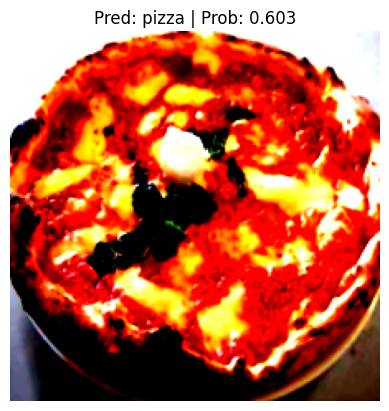

In [8]:
import utils


import pathlib as Path
class_names = class_names

import pandas as pd
df = pd.read_csv('data/macros.csv') #database placeholder
macro_nutrients = df[['name','serving_size','calories','total_fat','protein','carbohydrate','cholesterol','fiber','water']]
pred_name = utils.pred_and_plot_image(model=vit,
    image_path='image.png',
    class_names=class_names,
    transform=vit_transforms
    )
import pandas as pd
df = pd.read_csv('macros.csv') #database placeholder
macro_nutrients = df[['name','serving_size','calories','total_fat','protein','carbohydrate','cholesterol','fiber','water']]
print(macro_nutrients.loc[macro_nutrients["name"] == class_names[pred_name]].squeeze())